# Transformers model prediction

In [ ]:
from transformers import AutoConfig, AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
# import nlp
import transformers
import shap
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

  *  "crude": 0,
  *  "grain": 1,
  *  "interest": 2,
  *  "money-fx" : 3,
  *  "money-supply":4,
  *  "trade":5

In [ ]:
model_path = "prediction_files/xlnet/checkpoint-1500"
model_name = 'xlnet-base-cased'


# model_path = "prediction_files/bert/checkpoint-750"
# model_name = 'bert-base-cased'


tokenizer = AutoTokenizer.from_pretrained(model_name)
# config = AutoConfig.from_pretrained(model_path, num_labels=6)

In [ ]:
# Load trained model
model = AutoModelForSequenceClassification.from_pretrained(model_path)

In [ ]:
# load a transformers pipeline model
model1 = transformers.pipeline('text-classification',model =model,tokenizer=tokenizer, return_all_scores=True)

# explain the model on two sample inputs
explainer = shap.Explainer(model1) 

In [1]:
sample_text = '''
Heightened uncertainty in India caused by the coronavirus pandemic has led to a surge in currency in circulation as people hoard cash or park money in accessible deposits to safeguard themselves against salary cuts or job losses. According to Reserve Bank of India (RBI) data, India's M3 money supply rose 6.7 per cent in the first five months of this year compared with the same period last year, the highest growth in seven years. Currency in circulation, which measures money with the public and in banks has also surged. A rise in money supply usually is seen as a leading indicator of growth in consumption and business investments, but the rise this time is unlikely to bolster either, analysts said.
"We suspect that the recent increase reflects higher cash withdrawals by depositors to meet needs during the lockdown period, until normalcy returns," said Radhika Rao, an economist at DBS Bank.

Gross capital formation, or total investments toward fixed capital in the country, fell 7 per cent in the March quarter, a seven-year low, and analysts expect a further deterioration due to the pandemic. Lenders too are unwilling to take risks as slowing discretionary spending slows for manufactured and industrial goods.

"Risk-averse individuals are putting money in bank deposits, given the high and rising uncertainty, while on the other hand risk-averse lenders are not lending to those who need it," said Kunal Kumar Kundu, India economist at Societe Generale.
Mounting trade friction between the\n  U.S. And Japan has raised fears among many of Asia\'s exporting\n  nations that the row could inflict far-reaching economic\n  damage, businessmen and officials said.\n      They told Reuter correspondents in Asian capitals a U.S.\n  Move against Japan might boost protectionist sentiment in the\n  U.S. And lead to curbs on American imports of their products.\n      But some exporters said that while the conflict would hurt\n  them in the long-run, in the short-term Tokyo\'s loss might be\n  their gain.\n      The U.S. Has said it will impose 300 mln dlrs of tariffs on\n  imports of Japanese electronics goods on April 17, in\n  retaliation for Japan\'s alleged failure to stick to a pact not\n  to sell semiconductors on world markets at below cost.\n      Unofficial Japanese estimates put the impact of the tariffs\n  at 10 billion dlrs and spokesmen for major electronics firms\n  said they would virtually halt exports of products hit by the\n  new taxes.\n      "We wouldn\'t be able to do business," said a spokesman for\n  leading Japanese electronics firm Matsushita Electric\n  Industrial Co Ltd &lt;MC.T>.\n      "If the tariffs remain in place for any length of time\n  beyond a few months it will mean the complete erosion of\n  exports (of goods subject to tariffs) to the U.S.," said Tom\n  Murtha, a stock analyst at the Tokyo office of broker &lt;James\n  Capel and Co>.\n      In Taiwan, businessmen and officials are also worried.\n      "We are aware of the seriousness of the U.S. Threat against\n  Japan because it serves as a warning to us," said a senior\n  Taiwanese trade official who asked not to be named.\n      Taiwan had a trade trade surplus of 15.6 billion dlrs last\n  year, 95 pct of it with the U.S.\n      The surplus helped swell Taiwan\'s foreign exchange reserves\n  to 53 billion dlrs, among the world\'s largest.\n      "We must quickly open our markets, remove trade barriers and\n  cut import tariffs to allow imports of U.S. Products, if we\n  want to defuse problems from possible U.S. Retaliation," said\n  Paul Sheen, chairman of textile exporters &lt;Taiwan Safe Group>.\n      A senior official of South Korea\'s trade promotion\n  association said the trade dispute between the U.S. And Japan\n  might also lead to pressure on South Korea, whose chief exports\n  are similar to those of Japan.\n      Last year South Korea had a trade surplus of 7.1 billion\n  dlrs with the U.S., Up from 4.9 billion dlrs in 1985.\n      In Malaysia, trade officers and businessmen said tough\n  curbs against Japan might allow hard-hit producers of\n  semiconductors in third countries to expand their sales to the\n  U.S.\n      In Hong Kong, where newspapers have alleged Japan has been\n  selling below-cost semiconductors, some electronics\n  manufacturers share that view. But other businessmen said such\n  a short-term commercial advantage would be outweighed by\n  further U.S. Pressure to block imports.\n      "That is a very short-term view," said Lawrence Mills,\n  director-general of the Federation of Hong Kong Industry.\n      "If the whole purpose is to prevent imports, one day it will\n  be extended to other sources. Much more serious for Hong Kong\n  is the disadvantage of action restraining trade," he said.\n      The U.S. Last year was Hong Kong\'s biggest export market,\n  accounting for over 30 pct of domestically produced exports.\n      The Australian government is awaiting the outcome of trade\n  talks between the U.S. And Japan with interest and concern,\n  Industry Minister John Button said in Canberra last Friday.\n      "This kind of deterioration in trade relations between two\n  countries which are major trading partners of ours is a very\n  serious matter," Button said.\n      He said Australia\'s concerns centred on coal and beef,\n  Australia\'s two largest exports to Japan and also significant\n  U.S. Exports to that country.\n      Meanwhile U.S.-Japanese diplomatic manoeuvres to solve the\n  trade stand-off continue.\n      Japan\'s ruling Liberal Democratic Party yesterday outlined\n  a package of economic measures to boost the Japanese economy.\n      The measures proposed include a large supplementary budget\n  and record public works spending in the first half of the\n  financial year.\n      They also call for stepped-up spending as an emergency\n  measure to stimulate the economy despite Prime Minister\n  Yasuhiro Nakasone\'s avowed fiscal reform program.\n      Deputy U.S. Trade Representative Michael Smith and Makoto\n  Kuroda, Japan\'s deputy minister of International Trade and\n  Industry (MITI), are due to meet in Washington this week in an\n  effort to end the dispute.\n
'''

In [ ]:
model1([sample_text])

[[{'label': 'LABEL_0', 'score': 9.914378097164445e-06},
  {'label': 'LABEL_1', 'score': 2.480933653714601e-05},
  {'label': 'LABEL_2', 'score': 1.0626676157698967e-05},
  {'label': 'LABEL_3', 'score': 4.151897519477643e-05},
  {'label': 'LABEL_4', 'score': 1.8643591829459183e-05},
  {'label': 'LABEL_5', 'score': 0.9998944997787476}]]

In [ ]:
shap_values = explainer([sample_text])

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer: 2it [01:57, 117.79s/it]                                                                           


In [ ]:
shap.plots.text(shap_values[0, :, "LABEL_5"])

In [ ]:
shap.plots.text(shap_values)

,"Heightened uncertainty in India caused by the ccoronavirus pandemic has led to a surge in currency in circulation as people hoard cash or park money in accessible deposits to safeguard themselves against salary cuts or job losses. According to Reserve Bank of India ((RBI) data, India's M3 money supply rose 6.7 per cent in the first five months of this year compared with the same period last year, the highest growth in seven years. Currency in circulation, which measures money with the public and in banks has also surged. A rise in money supply usually is seen as a leading indicator of growth in consumption and business investments, but the rise this time is unlikely to bolster either, analysts said.","""""We suspect that the recent increase reflects higher cash withdrawals by depositors to meet needs during the lockdown period, until normalcy returns,"" said Radhika Rao, an economist at DBS Bank. Gross capital formation, or total investments toward fixed capital in the country, fell 7 per cent in the March quarter, a seven-year low, and analysts expect a further deterioration due to the pandemic.","Lenders too are unwilling to take risks as slowing discretionary spending slows for manufactured and industrial goods. """"Risk-averse individuals are putting money in bank deposits, given the high and rising uncertainty, while on the other hand risk-averse lenders are not lending to those who need it,"" said Kunal Kumar Kundu, India economist at SSociete Generale. Mounting trade friction between the U.S. And Japan has raised fears among many of Asia's exporting nations that the row could inflict far-reaching economic damage, businessmen and officials said.","They told Reuter correspondents in Asian capitals a U.S. Move against Japan might boost protectionist sentiment in the U.S. And lead to curbs on American imports of their products. But some exporters said that while the conflict would hurt them in the long-run, in the short-term Tokyo's loss might be their gain. The U.S.","Has said it will impose 300 mmln dlrs of tariffs on imports of Japanese electronics goods on April 17,",in retaliation for Japan's alleged failure to stick to a pact not to sell semiconductors on world markets at below cost.,"Unofficial Japanese estimates put the impact of the tariffs at 10 billion dlrs and spokesmen for major electronics firms said they would virtually halt exports of products hit by the new taxes. """"We wouldn't be able to do business,"" said a spokesman for leading Japanese electronics firm Matsushita Electric Industrial Co Ltd <MC.T>.","""""If the tariffs remain in place for any length of time beyond a few months it will mean the complete erosion of exports ((of goods subject to tariffs) to the U.S.,"" said Tom Murtha, a stock analyst at the Tokyo office of broker <James Capel and Co>.","In Taiwan, businessmen and officials are also worried. """"We are aware of the seriousness of the U.S. TThreat against Japan because it serves as a warning to us,"" said a senior Taiwanese trade official who asked not to be named. Taiwan had a trade trade surplus of 15.6 billion dlrs last year, 95 ppct of it with the U.S. The surplus helped swell Taiwan's foreign exchange reserves to 53 billion dlrs, among the world's largest.","""""We must quickly open our markets, remove trade barriers and cut import tariffs to allow imports of U.S. Products, if we want to defuse problems from possible U.","S. Retaliation,"" said Paul Sheen, chairman of textile exporters <Taiwan Safe Group>. A senior official of South Korea's trade promotion association said the trade dispute between the U.S.","And Japan might also lead to pressure on South Korea, whose chief exports are similar to those of Japan. Last year South Korea had a trade surplus of 7.1 billion dlrs with the U.S.",", Up from 4.9 billion dlrs in 1985. In Malaysia, trade officers and businessmen said tough curbs against Japan might allow hard-hit producers of semiconductors in third countries to expand their s

# UlmFit model prediction

In [2]:
# !pip install shap

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import fastai, shap 
import joblib
import torch
from torch import nn
from fastai import *
from fastai.text import *

In [3]:
def process_doc(learn, doc):
    xb, yb = learn.data.one_item(doc)
    padded = nn.ConstantPad1d((batch_shape - xb.shape[1], 0), 1)(xb)
    return padded

In [4]:
path = '/content/drive/MyDrive/ColabData/ulmfit'

In [5]:
data_clas = load_data(path,'data_clas.pkl')

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [6]:
learn = load_learner(path, 'ULMfit_classifier_news_export')
# learn.model.eval()

In [7]:
batch = data_clas.one_batch()
batch_shape = batch[0].shape[1]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [8]:
ULMexplainer = shap.GradientExplainer(learn.model[1].layers[-2],batch[0])

In [9]:
with torch.no_grad():
    results = learn.predict(sample_text)

In [10]:
decision = str(results[0])
probas = to_np(results[2])
classes_probas = {str(c):p for c,p in zip(learn.data.train_ds.y.classes, probas)}
classes_probas

{'crude': 0.00033683903,
 'grain': 0.00063286023,
 'interest': 0.0014491682,
 'money-fx': 0.0009485487,
 'money-supply': 0.0014849964,
 'trade': 0.99514765}

In [11]:
padded = process_doc(learn, sample_text)

shap_values,indexes =  ULMexplainer.shap_values(padded, ranked_outputs=20,rseed=0)

In [25]:
# temp = []
# for k in padded[0].cpu():
#   if k in padded[0].cpu()[indexes[0]]:
#     word = 'PPP_'+ np.array(data_clas.valid_dl.vocab.itos)[k].upper()
#   else:
#     word = np.array(data_clas.valid_dl.vocab.itos)[k]
#   temp.append(word)
#   print(" ".join(temp))

In [21]:
count = 0
w = []
for  x , ind, label in zip(padded,indexes,batch[1]):
    x = x.cpu() # move to CPU
    words = np.array(data_clas.valid_dl.vocab.itos)[x[ind]]
    weight = []
    for idx, j in enumerate(ind):
        weight.append(shap_values[idx][count][j])
    count +=1
    print(words, label)
    print(weight)

['manoeuvres' 'rbi' 'correspondents' 'societe' 'heightened' 'stepped' 'slows' 'restraining' 'unwilling' 'promotion'
 'kuroda' 'makoto' 'works' 'outweighed' '4.9' 'erosion' 'length' 'suspect' '6.7' 'purpose'] tensor(5)
[6865.115, 6982.78, 6602.465, 6529.225, 6301.9, 5460.355, 6000.83, 5205.735, 5710.26, 5300.345, 4987.535, 5397.775, 5202.885, 4788.7, 4895.845, 4646.73, 4937.85, 5155.145, 4889.12, 4290.93]


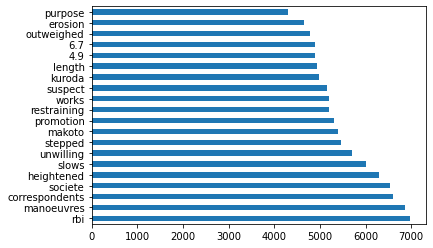

In [22]:
feat_importances = pd.Series(weight, index=words)
feat_importances.nlargest(20).plot(kind='barh')

In [27]:
shap_values =  ULMexplainer.shap_values(padded,rseed=0)

In [29]:
len(shap_values)

1359